In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [76]:
data=pd.read_csv("Swiggy_Bangalore.csv")

In [77]:
data

,Restaurant Name,Category,Rating,Cost for Two (in Rupees),Area,Offer,URL
0,Khichdi Paradise,"Home Food, Desserts, Beverages, Healthy Food",NaN,250,Arekere,NaN,https://www.swiggy.com/restaurants/khichdi-par...
1,Home Plate by EatFit,"North Indian, Home Food, Healthy Food, Indian,...",3.9,160,Arekere,NaN,https://www.swiggy.com/restaurants/home-plate-...
2,THE GRILL & CO.,"Indian, Tandoor, Biryani",NaN,300,Arekere,NaN,https://www.swiggy.com/restaurants/the-grill-a...
3,555 Darjeeling Unique Asian Cuisine,Asian,NaN,300,Arekere,NaN,https://www.swiggy.com/restaurants/555-darjeel...
4,Momo Guy,"Asian, Tibetan, Desserts, Beverages",NaN,200,Arekere,NaN,https://www.swiggy.com/restaurants/momo-guy-jp...
...,...,...,...,...,...,...,...
10292,Holy Chic,Continental,NaN,700,Yeshwanthpur,NaN,https://www.swiggy.com/restaurants/holy-chic-y...
10293,PAPA ROLLS,"North Indian, Chinese",NaN,150,Yeshwanthpur,NaN,https://www.swiggy.com/restaurants/papa-rolls-...
10294,RICE SAMBAR,"South Indian, Chinese",NaN,400,Yeshwanthpur,NaN,https://www.swiggy.com/restaurants/rice-sambar...
10295,Paris Family Restaurant,"Chinese, South Indian, Desserts, Fast Food, Ke...",3.6,400,Yeshwanthpur,NaN,https://www.swiggy.com/restaurants/paris-famil...


In [78]:
categ=np.array(data.Category)

In [79]:
categ

array(['Home Food, Desserts, Beverages, Healthy Food',
       'North Indian, Home Food, Healthy Food, Indian, Punjabi, South Indian, Rajasthani...',
       'Indian, Tandoor, Biryani', ..., 'South Indian, Chinese',
       'Chinese, South Indian, Desserts, Fast Food, Kerala, Andhra, Mughlai, Seafood, Pu...',
       'Indian, Combo, Beverages'], dtype=object)

In [80]:
list_categ=list()
for i,val in enumerate(categ):
    aa=val.replace(" ","")
    bb=aa.split(",")
    list_categ=list_categ+bb
    

In [81]:
cat_counts=Counter(list_categ)
df = pd.DataFrame.from_dict(cat_counts, orient='index',columns=['freqs'])

In [82]:
df1=df['freqs'].nlargest(50)

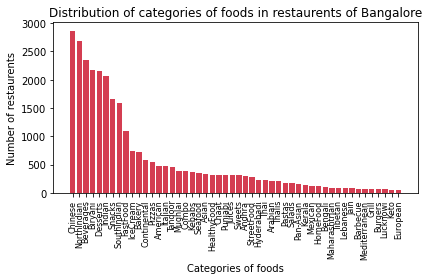

In [91]:
plt.bar(df1.index,np.array(df1),color="#d43d51")
plt.title("Distribution of categories of foods in restaurents of Bangalore")
plt.xlabel("Categories of foods")
plt.ylabel("Number of restaurents")
plt.xticks(df1.index, rotation=90)
plt.tick_params(axis='x', which='major', labelsize=8)
plt.tight_layout()
plt.savefig("freqs.svg",format='svg')
plt.show()

In [84]:
avg=list()
for i,val in enumerate(np.unique(data.Area)):
    aa=data[data.Area==val]['Cost for Two (in Rupees)'].mean(skipna=True)
    avg=avg+[aa]

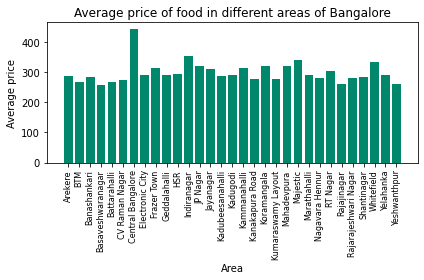

In [90]:
plt.bar(np.unique(data.Area),np.array(avg),color="#00876c")
plt.title("Average price of food in different areas of Bangalore")
plt.xlabel("Area")
plt.ylabel("Average price")
plt.xticks(np.unique(data.Area), rotation=90)
plt.tick_params(axis='x', which='major', labelsize=8)
plt.tight_layout()
plt.savefig("freqs2.svg",format='svg')
plt.show()